# Activity detector
## \[5ARB0\] Data Acquisition and Analysis - Technical Assignment

In [1]:
# this cell imports the libraries or packages that you can use during this assignment
# you are not allowed to import additional libraries or packages
from helpers import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import multivariate_normal
from sklearn.decomposition import FastICA, PCA

> **Important**
>
> Do not import any other packages or libraries than the ones already provided to you.
>
> Write your code between the `BEGIN_TODO` and `END_TODO` markers. Do not change these markers.
>
> Restart your notebook and run all cells before submission.

## Introduction
In this assignment you will learn about unsupervised machine learning methods and apply them to create an activity detector. After collecting and preprocessing sensor recording, you will use the deterministic K-means algorithms for clustering data. Next up you will consider using a generative or probabilistic model for modeling (overlapping) clusters of data. Finally, you will put these methodologies into practice for creating an activity detector.

This assignment is split into 6 parts. Parts 1-3 encompass the collection, preprocessing and feature extraction of sensor recordings. Part 4 will guide you through implementing your own K-means algorithm. Part 5 will introduce you to the Gaussian mixture model, which you will train using the expectation-maximization algorithm. Finally, in part 6 you will combine both techniques to create an activity detector.

### Learning goals
After this assignment you can
- implement the K-means algorithm;
- explain issues and shortcoming of the K-means algorithm;
- implement the Gaussian mixture model for clustering;
- explain how the Gaussian mixture model differs from the K-means algorithm;
- apply both algorithms on a real data set;

## Part 1: Data collection

Download an app that can record the sensor readings of your phone. For this purpose we recommend the free _Sensor Logger_ app (available on [iOS](https://apps.apple.com/us/app/sensor-logger/id1531582925) and [Android](https://play.google.com/store/apps/details?id=com.kelvin.sensorapp&hl=nl&gl=US)). Other apps are also allowed, but are not supported by the course. 

> (For iPhone) If you have issues accessing the (live) calibrated data of the _Sensor Logger_ app, you need to enable motion and compas calibration on your phone as explained [here](https://www.lifewire.com/how-to-calibrate-an-iphone-4172146). You will notice this once the live view and the export yield empty results.

Collect the data which you deem necessary for your experiment (a minimum of 2 sensors is required). Think carefully about what you want to measure and how you would like to measure it.

## Part 2: Data cleaning and preprocessing
In this part you will be working on cleaning and preprocessing the data that you have gathered for further analysis.


---
---
### Exercise 2.1: Read, merge and select data (10 points) 
Load the desired recordings in a Pandas DataFrame called `data`. You may want to have a look at the `pd.merge_asof` function to combine the individual recordings. Make sure that the `data` dataframe does not contain any `NaN`'s or empty fields as a result of different sampling frequencies. Any columns/recordings that you will not be using in your experiment should be removed from `data` (except for the `seconds_elapsed` column). Also remove duplicate colums. In the end your dataframe should have an indexing column, a column called `seconds_elapsed`, followed by the columns corresponding to the measurements.

In [2]:
#// BEGIN_TODO [5ARB0_ActivityDetector_2_1] Read, merge and select data (10 points)

def find_csv_filenames(path_to_dir, suffix=".csv"):
    """
    find all csv files in the folder directory route.\\
    `path_to_dir` is the route directory, using os.getcwd() for the current folder as an example.\\
    Return a list.
    """
    filenames = os.listdir(path_to_dir)
    return [filename for filename in filenames if filename.endswith(suffix)]

def readCSVfiles(filenames,Path, input_files):
    """
    # read collected data with csv files
    ----------------------------------------------------------------
    filenames - from `find_csv_filenames` - a list \\
    Path - the absolute path \\
    input_files - the list with desired data files. \\
    # return dictionary data
    - df = {'file1 name': dataframe1, 'file2 name': dataframe2...}
    -----------
    `if filenames[x] in input_files:  # check if file is needed
            print(filenames[x], 'is in the list')
	# create dictionary with filenames as keys and drop the time column
	# if null in the dataframe
            df[filenames[x]] = pd.read_csv(filenames[x]).drop('time', axis=1)
            if df[filenames[x]].isnull().values.any():  
                print('Find empty')
                df[filenames[x]] = df[filenames[x]].dropna()
            else:
                print('no null space in ', filenames[x])`
    """
    df = {}
    x = 0
    if input_files in filenames:
        print('missing file.')
    for filenames[x] in filenames:
        if filenames[x] in input_files:  # check if file is needed
            print(filenames[x], 'is in the list')
            # create dictionary with filenames as keys and drop the time column
            df[filenames[x]] = pd.read_csv(Path+'/'+filenames[x]).drop('time', axis=1)
            if df[filenames[x]].isnull().values.any():  # if null in the dataframe
                print('Find empty null space')
                df[filenames[x]] = df[filenames[x]].dropna()
            else:
                print('no null space in ', filenames[x])
        else:
            pass
            #print('file not in the list')
        x = x+1

    
    return(df)
def Check_filesNo(folder_name,Infiles,current=True):
    """
    # `Check_filesNo(folder_list,Infiles)`
    `folder_name`: Manual keyin. Data folder. \\
    `Infiles`: Interested files list.
    `current`: `True`(default)- check current folder files. `False`- check manually keyin `folder_name` directory.
    ----------------------------------------------------------------
    Check all Infiles in folder_list, if match, will return `Folder route`
    """
    if current ==True:
        return (os.getcwd()) # search through current folder only.
    else:
        if current == False:
            if os.path.isdir(str(folder_name)):
                PATH = os.path.join(os.getcwd(),str(folder_name)) # use os.getcwd find current route, and joinned with interested folder name.
                folder_list = [x[0] for x in os.walk(PATH)]       # list all folder under the folder_name.

                # check if recorded files sufficient.
                for j in range(len(folder_list)):
                    print('Read path:', folder_list[j], '\n')     # check read file route.
                    filename = find_csv_filenames(folder_list[j]) # list of all files with csv file
                    sub_set = set(filename)
                    if set(Infiles).issubset(set(filename)):
                        print('Match folder,',j,folder_list[j],'\n') 
                        Folder_route = folder_list[j]
                    else:
                        print(folder_list[j],'missing.')        # if found missing file under folder, return missing warning.

            else:
                pass
        return(Folder_route) # string of folder route.        

# list of necessary files
Infiles = ['Accelerometer.csv', 'Gyroscope.csv']  
# get file route
file_rt = Check_filesNo('data', Infiles, False)  # return file return
# print file route
print('Final return file router:', file_rt)

filename = find_csv_filenames(file_rt)  # all csv under file_rt (route)
df = readCSVfiles(filename, file_rt, Infiles)  # pd.read csv file

# merge files
data = pd.merge_asof(df[Infiles[0]], df[Infiles[1]], on='seconds_elapsed')
r1 = df[Infiles[0]].shape[1]  # number of rows
r2 = df[Infiles[1]].shape[1]
if (data.shape[1]+1) == (r1+r2):
    print('Match')
else:
    print('didnt match, merged row numbers:', data.shape[1])
#// END_TODO [5ARB0_ActivityDetector_2_1]

Read path: c:\Users\lmd\Desktop\lmd7\5ARB0_1_1\data 

c:\Users\lmd\Desktop\lmd7\5ARB0_1_1\data missing.
Read path: c:\Users\lmd\Desktop\lmd7\5ARB0_1_1\data\2022-09-09_13-14-55 

c:\Users\lmd\Desktop\lmd7\5ARB0_1_1\data\2022-09-09_13-14-55 missing.
Read path: c:\Users\lmd\Desktop\lmd7\5ARB0_1_1\data\2022-09-16_11-15-46 

Match folder, 2 c:\Users\lmd\Desktop\lmd7\5ARB0_1_1\data\2022-09-16_11-15-46 

Final return file router: c:\Users\lmd\Desktop\lmd7\5ARB0_1_1\data\2022-09-16_11-15-46
Accelerometer.csv is in the list
no null space in  Accelerometer.csv
Gyroscope.csv is in the list
no null space in  Gyroscope.csv
Match


In [3]:
data

,seconds_elapsed,z_x,y_x,x_x,z_y,y_y,x_y
0,0.759861,0.082162,0.445240,-0.873332,1.544008,-0.050707,-0.009774
1,0.769817,0.098772,0.138311,-0.701677,1.538340,0.021202,0.021893
2,0.779774,-0.081512,0.295334,-0.287733,1.599437,0.007820,0.010326
3,0.789730,-0.106220,0.693047,-0.036407,1.677382,-0.013688,0.004111
4,0.799687,-0.162763,0.920265,0.441457,1.780172,0.014400,0.006886
...,...,...,...,...,...,...,...
2059,21.260829,0.084030,-0.057202,0.011003,0.001453,-0.004030,0.002570
2060,21.270785,0.002930,-0.026044,0.054504,-0.001855,-0.002240,-0.001006
2061,21.280742,-0.114242,-0.038044,0.070609,0.000911,-0.005023,-0.006203
2062,21.290699,-0.106477,-0.095897,0.024422,-0.000531,-0.008525,-0.008533


### End of exercise 2.1
---
---

In order to restrict our focus to activity detection, we would like to trim the recorded segment. In this way we can remove the movements corresponding to starting and stopping the sensor logger app. 

---
---
### Exercise 2.2: Trim data (10 points)
Remove the first and last 5 seconds of the recordings for this purpose and save this trimmed data frame to `data_trimmed`. Make sure that your code works for a data frame containing an arbitrary number of columns.

In [4]:
#// BEGIN_TODO [5ARB0_ActivityDetector_2_2] Trim data (10 points)

if max(data['seconds_elapsed']) < 10:
    print('Elapsed recording time insufficient.', '\n')
    print('Suggest load new record file in `Check_filesNo`.')
    data_trimmed = None
else:
    df_1 = data[data['seconds_elapsed'] > 5]
    df = df_1[df_1['seconds_elapsed'] < (max(data['seconds_elapsed']) - 5)]
    data_trimmed = df.reset_index(drop=True)

#// END_TODO [5ARB0_ActivityDetector_2_2]

In [5]:
data_trimmed

,seconds_elapsed,z_x,y_x,x_x,z_y,y_y,x_y
0,5.001415,0.937749,-0.302560,-0.676742,-0.018778,0.348560,-0.369324
1,5.011372,0.651123,-0.257270,-0.478853,-0.025049,0.304285,-0.295255
2,5.021328,0.541848,-0.174886,-0.366655,-0.006584,0.229154,-0.218308
3,5.031285,0.701764,-0.143197,-0.279930,0.008772,0.135466,-0.205048
4,5.041242,0.942130,-0.109006,-0.230385,0.010124,0.045249,-0.250820
...,...,...,...,...,...,...,...
1130,16.252560,0.440132,1.488263,-3.424579,1.028780,0.169918,0.395463
1131,16.262517,0.929169,1.614524,-2.944316,0.999186,-0.035313,0.220656
1132,16.272474,1.016814,1.461325,-2.834650,0.965758,-0.251449,0.056111
1133,16.282430,0.732087,1.249717,-3.006158,0.906880,-0.404517,-0.028108


### End of exercise 2.2
---
---

---
---
### Exercise 2.3: Normalize recordings (10 points)
For improved processing, the recordings should be normalized. Normalize the recordings by subtracting its mean and by then dividing by its standard deviation. Perform this normalization for each column individually. Save your normalized data in the the data frame `data_norm`.

In [6]:
#// BEGIN_TODO [5ARB0_ActivityDetector_2_3] Normalize recordings (10 points)

# data_norm0 = (data_trimmed-data_trimmed.mean())/data_trimmed.std()
# data_norm = data_trimmed.apply(lambda x:(x-x.mean())/x.std())
# data_norm
data_norm = data_trimmed.apply(lambda x: (x-x.mean())/x.std())

data_norm['seconds_elapsed'] = data_trimmed[['seconds_elapsed']]

#// END_TODO [5ARB0_ActivityDetector_2_3]

In [7]:
data_norm

,seconds_elapsed,z_x,y_x,x_x,z_y,y_y,x_y
0,5.001415,0.787626,-0.481987,-0.375022,-0.055086,0.488573,-0.582131
1,5.011372,0.605520,-0.464965,-0.314866,-0.058991,0.423717,-0.442911
2,5.021328,0.536093,-0.434002,-0.280759,-0.047494,0.313662,-0.298279
3,5.031285,0.637694,-0.422092,-0.254395,-0.037934,0.176422,-0.273357
4,5.041242,0.790410,-0.409241,-0.239335,-0.037092,0.044267,-0.359390
...,...,...,...,...,...,...,...
1130,16.252560,0.471467,0.191088,-1.210333,0.597135,0.226890,0.855372
1131,16.262517,0.782175,0.238543,-1.064338,0.578710,-0.073743,0.526803
1132,16.272474,0.837860,0.180963,-1.031001,0.557897,-0.390352,0.217521
1133,16.282430,0.656960,0.101431,-1.083137,0.521239,-0.614573,0.059223


### End of exercise 2.3
---
---

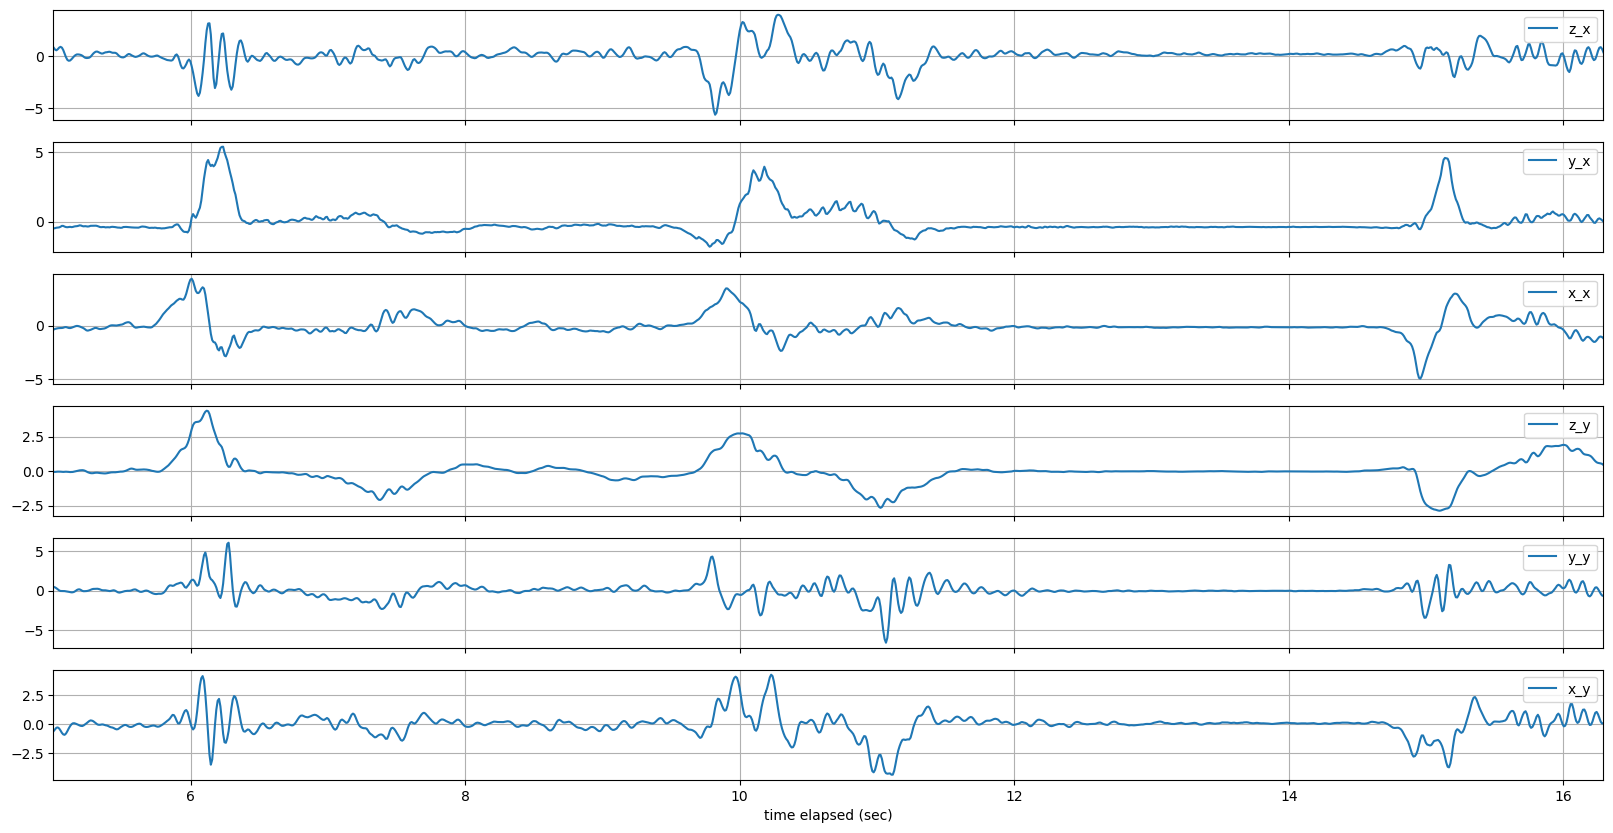

In [8]:
# plot recordings
ex2_plot_data(data_norm)

## Part 3: Feature extraction
The current data is not yet suited for detecting activities. Based on the measurements at a specific point of time, it is very difficult to determine the type of activity. Instead, it would be more appropriate to perform the activity detection over _segments_ of time. In this part you will extract features that will be used for detecting activities.

---
---
### Exercise 3.1: Convert data frame to matrix (10 points)
In order to extract features from the recording, first convert the dataframe to a Numpy matrix called `mat`. This matrix should have dimensions (_nr of time points_, _nr or different recordings_). Make sure that you remove the _seconds_elapsed_ column, as this does not yield any useful information for the activity detector.

In [9]:
#// BEGIN_TODO [5ARB0_ActivityDetector_3_1] Convert data frame to matrix (10 points)

data_mat = data_norm.drop(["seconds_elapsed"],axis=1)
mat = np.asmatrix(data_mat)
mat

#// END_TODO [5ARB0_ActivityDetector_3_1]

matrix([[ 0.78762636, -0.48198741, -0.37502189, -0.05508638,  0.48857312,
         -0.58213108],
        [ 0.60551977, -0.46496525, -0.31486576, -0.05899087,  0.42371653,
         -0.44291068],
        [ 0.53609265, -0.43400154, -0.28075909, -0.04749401,  0.31366194,
         -0.29827869],
        ...,
        [ 0.83786017,  0.18096338, -1.03100126,  0.55789694, -0.39035155,
          0.21752134],
        [ 0.65696016,  0.10143121, -1.08313748,  0.52123916, -0.61457308,
          0.05922335],
        [ 0.33111504,  0.00488371, -1.20731018,  0.44341307, -0.67270904,
          0.09834547]])

### End of exercise 3.1
---
---

Now that the data frame has been converted to a matrix, it can be split into different overlapping segments, of which we can extract features. As a starting point we will specify features as the mean value of a segment, its standard deviation, its minimum and its maximum.

---
---
### Exercise 3.2: Processing segments (30 points)
Create a function `Y = process_segment(mat, fun, L, K)` that processes time segments of the matrix `mat`. The argument `fun` specifies the operation to be performed on the segment and its value comes from the set `["mean", "std", "minimum", "maximum"]`. `L` specifies the segment length and `K` specifies the number of samples overlap between segments. The function should return a matrix `Y` with dimensions (_nr of segments_, _nr of different recordings_)

In [10]:
#// BEGIN_TODO [5ARB0_ActivityDetector_3_2] Process segments (30 points)

def process_segment(mat, fun, L, K):
    """
    processes time segments of the matrix `mat` \\
    `fun `operation to be performed on the segment, values from `["mean", "std", "minimum", "maximum"]`\\
    `L` - segment length \\
    `K` - the number of samples overlap between segments\\
    --------------------------------
    Return matrix[Y] - (_nr of segments_, _nr of different recordings_)\\
    """
    Y = np.zeros(shape=(mat.shape[0]//K, mat.shape[1]))
    # shape=(mat.shape[1]+1,mat.shape[0]//K)+1
    if fun == "mean":
        for k in range(mat.shape[1]):
            for i in range(mat.shape[0]//K):
                Y[i, k] = np.mean(mat[i*K:i*K+L, k])
    elif fun == "std":
        for k in range(mat.shape[1]):
            for i in range(mat.shape[0]//K):
                Y[i, k] = np.std(mat[i*K:i*K+L, k])
    elif fun == "minimum":
        for k in range(mat.shape[1]):
            for i in range(mat.shape[0]//K):
                Y[i, k] = np.min(mat[i*K:i*K+L, k])
    elif fun == "maximum":
        for k in range(mat.shape[1]):
            for i in range(mat.shape[0]//K):
                Y[i, k] = np.max(mat[i*K:i*K+L, k])
    else:
        print("Wrong input, please retry.")
    return Y


#// END_TODO [5ARB0_ActivityDetector_3_2]

In [11]:
Y_mean = process_segment(mat, "mean", 100, 50)
Y_std = process_segment(mat, "std", 100, 50)
Y_minimum = process_segment(mat, "minimum", 100, 50)
Y_maximum = process_segment(mat, "maximum", 100, 50)

### End of exercise 3.2
---
---

---
---
### Exercise 3.3: Concatenate features (10 points)
Now that you have computed some features of the recordings, it becomes necessary to combine them into a single matrix. Create the matrix `features` which concatenates the above results along the appropriate axis.

In [12]:
#// BEGIN_TODO [5ARB0_ActivityDetector_3_3] Concatenate features (10 points)

features = np.concatenate((Y_mean, Y_std, Y_minimum, Y_maximum),1)
features
#// END_TODO [5ARB0_ActivityDetector_3_3]

array([[-1.13039223e-03, -3.99304344e-01,  3.66919186e-01,
         1.98407830e-01,  9.52986076e-02, -2.61966130e-02,
         3.81589779e-01,  9.72354820e-02,  9.97722679e-01,
         5.28289679e-01,  3.34248423e-01,  3.82986665e-01,
        -1.21120294e+00, -7.73127225e-01, -4.75091168e-01,
        -1.67995821e-01, -4.27421394e-01, -9.06828376e-01,
         8.68067666e-01, -1.93406662e-01,  3.94824761e+00,
         2.29108856e+00,  1.03530413e+00,  1.21796673e+00],
       [-3.65288576e-01,  8.58688671e-01,  3.92178848e-01,
         1.12323830e+00,  6.78715562e-01,  2.32439019e-01,
         1.33805069e+00,  1.90795059e+00,  1.87631493e+00,
         1.37870998e+00,  1.48185721e+00,  1.25064187e+00,
        -3.86274898e+00, -7.73127225e-01, -2.88427107e+00,
        -8.49453633e-02, -2.03051320e+00, -3.46948978e+00,
         3.13951577e+00,  5.37904981e+00,  4.39405852e+00,
         4.38878031e+00,  6.11389488e+00,  4.13158426e+00],
       [-3.87090463e-01,  1.12738500e+00, -2.43820769e

### End of exercise 3.3
---
---

---
---
### Exercise 3.4: PCA and ICA (20 points)
The current list of features is relatively large. For illustration purposes, we will reduce its dimensionality.
Use the `sklearn` functions `PCA` and `FastICA` to create the variables `ica_object` and `pca_object` using 2 components each. Use these objects to fit and transform your `features` matrix and save the transformed set of features in the matrix `data_transformed_pca` and `data_transformed_ica`, respectively. Pick one of these transformed data sets that you think will work best for clustering and copy this one to the matrix `data_transformed`.

In [13]:
#// BEGIN_TODO [5ARB0_ActivityDetector_3_4] PCA and ICA (20 points)

# ===== =====> Replace this line by your code. <===== ===== #

#// END_TODO [5ARB0_ActivityDetector_3_4]

In [18]:
# from sklearn.decomposition import FastICA, PCA
# # use 2 components
# `ica_object` and `pca_object`
# save the transformed set of features in the matrix `data_transformed_pca` and `data_transformed_ica`
# Pick one of these transformed data sets that you think will work best for clustering and copy this one to the matrix `data_transformed`.
print(features.shape)
print(features[0:3,0])
# features[:, 0] # column - mean
ica_object = PCA(n_components=2)
pca_object = FastICA(n_components=2)

data_transformed_pca = ica_object.fit_transform(features)
# print(ica_object.explained_variance_)
data_transformed_ica = pca_object.fit_transform(features)

data_transformed = data_transformed_ica
data_transformed.shape
# print(data_transformed_pca)
# PCA.inverse_transform(data_transformed_pca)


(22, 24)
[-0.00113039 -0.36528858 -0.38709046]


d:\Users\lmd\anaconda3\envs\environment\lib\site-packages\sklearn\decomposition\_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(


(22, 2)

(Text(0.5, 1.0, 'PCA'), Text(0.5, 1.0, 'ICA'))

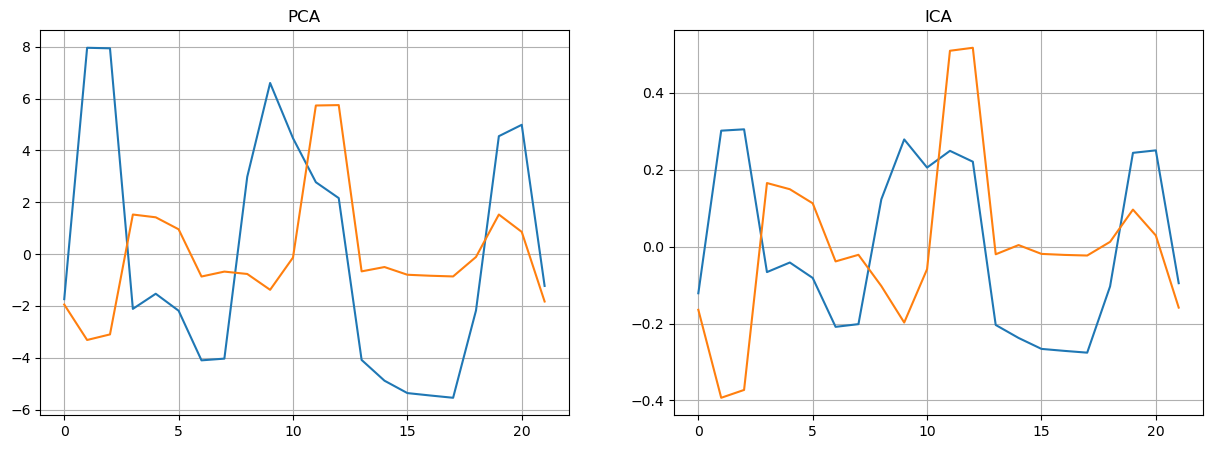

In [15]:
_, ax = plt.subplots(ncols=2, figsize=(15,5))
ax[0].plot(data_transformed_pca)
ax[1].plot(data_transformed_ica)
ax[0].grid(True), ax[1].grid(True)
ax[0].set_title("PCA"), ax[1].set_title("ICA")

## Part 4: K-means algorithm
In this part we will discuss unsupervised machine learning problems and describe how the K-means algorithm can be used to solve these.

Unsupervised machine learning problems are problems in which we try to determine some particular structure within a data set. On the contrary, supervised machine learning problems require us to model some kind of input-output mapping. Unsupervised machine learning problems do not have a specified output which we would like to model. Instead we are interesting in making sense of the data in grouping this data, without knowing beforehand which and how many groups exist.

The K-means algorithm can group $N$ data samples of dimension $D$ into $K$ groups or clusters. These clusters can each be characterized by their mean vector: the expected or average value of the points which are assigned to the cluster. The mean vector denoting the center of the $k^{th}$ cluster can be represented as the column vector ${\bf{\mu}}^{(k)} = [\mu_1^{(k)},\ \mu_2^{(k)},\ \ldots, \mu_D^{(k)}]^\top$ and the $n^{th}$ data sample can be represented by the column vector ${\bf{x}}^{(n)} = [x_1^{(n)},\ x_2^{(n)},\ \ldots, x_D^{(n)}]^\top$, where the superscript denotes the sample index.

The K-means algorithm tries to minimize the (within-cluster) Euclidean squared distance
$$J({\bf{X}}, {\bf{\mu}}) = \frac{1}{N}\sum_{n=1}^N \sum_{k=1}^K \rho_k^{(n)} \| {\bf{x}}^{(n)} - {\bf{\mu}}^{(k)}\|^2$$
Here $\rho_k^{(n)}$ is a so-called indicator function that is defined as 
$$ \rho_k^{(n)} = \begin{cases} 1 & \text{if sample }{\bf{x}}^{(n)}\text{ is assigned to cluster }k \\ 0 & \text{otherwise}\end{cases}$$
This indicator function equals $1$ when the corresponding data point is assigned to the corresponding cluster and $0$ otherwise. The cost function therefore represents the average squared distance with respect to the cluster that a point is assigned to.

The algorithm is specified as follows:

1. Initialize means ${\bf{\mu}}$.
2. Assign data points to closest cluster mean (i.e. update $\rho_k^{(n)}$).
3. Calculate new cluster means as the average values of the points that are assigned to it (i.e. update ${\bf{\mu}}$).
4. Calculate cost function $J({\bf{X}}, {\bf{\mu}})$.
5. If not converged, go back to 2 and repeat.

Here we will describe the algorithm in words. First the centers of the clusters are initialized. This can be done arbitrarily, but often the centers are set to random (but distinct) samples of the data set.
Once the means are set, we assign each data sample to the cluster that is closest to it. In order to do so, we calculate the Euclidean squared distance between a point and all the clusters and find the cluster that is closest to it. We repeat this for all points and we therefore completely specify $\rho_k^{(n)}$. Once all points have been assigned to a cluster, we look up all points corresponding to a certain cluster and we average these to calculate the new cluster center. We update all cluster means. Then we evaluate the current fit of the clusters on the data by evaluate the cost function. If we still see a significant improvement in the cost function, we repeat updating the assignments and cluster centers and if the cost function seems to have converged, we stop iterating.

In this part of the assignment you will implement the K-means algorithm from scratch, starting with the initialization of the cluster means.


---
---
### Exercise 4.1: Initializing cluster centers (10 points) 
Consider the function `X = ex4_generate_data()` which generates a matrix ${\bf{X}}$ of shape (N x D), representing the vertical concatenation of $N$ transposed data vectors of dimension $D$. Create a function `means = initialize_means(X, K)` that accepts the data set ${\bf{X}}$  and number of clusters $K$ as input and returns a matrix of shape (K x D), representing the vertical concatenation of $K$ transposed mean vectors of dimension $D$. These means should be initialized such that they coincide with *random* samples from the data set, which are always *distinct*. In other words, the means should equal a random subset of the availabe data set, where no means are equal. Also keep in mind that the number of clusters is variable in this function.

In [16]:
#// BEGIN_TODO [5ARB0_ActivityDetector_4_1] Complete the function initialize_means(X, K) (10 points)

# ===== =====> Replace this line by your code. <===== ===== #

#// END_TODO [5ARB0_ActivityDetector_4_1]

In [26]:
np.random.rank(K,1)

AttributeError: module 'numpy.random' has no attribute 'rank'

In [38]:
X = ex4_generate_data()
# print(range(2))
for i in range(2):
    print(i)

0
1


In [48]:
def initialize_means(X, K):
    D = X.shape[1]
    Cluster_Centers = np.mat(np.zeros((K,D)))
    for i in range(D):
        scale = float(max(np.mat(X)[:,i]) - min(np.mat(X)[:,i]))
        Cluster_Centers[:,i] = min(np.mat(X)[:,i]) + scale*np.random.rand(K,1)
    Cluster_Centers = np.array(Cluster_Centers)
    return Cluster_Centers

(3, 2)


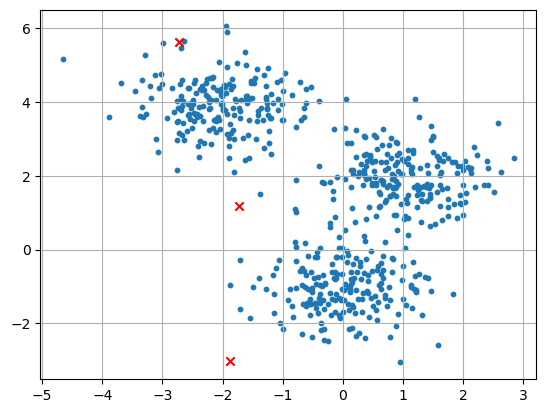

In [49]:
# generate data
X = ex4_generate_data()

# initialize means
means = initialize_means(X, 3)
print(means.shape)


# plot data
plt.figure()
plt.scatter(X[:,0], X[:,1], 10)
plt.scatter(means[:,0], means[:,1], c="red", marker="x")
plt.grid()

### End of exercise 4.1
---
---

Now that the clusters have been initialized, it is time to assign points to the closest clusters.

---
---
### Exercise 4.2: Assign points to clusters (20 points)
Again consider the function `X = ex4_generate_data()` which generates a matrix ${\bf{X}}$ of shape (N x D), representing the vertical concatenation of $N$ transposed data vectors of dimension $D$. Create a function `rho = assign_data_to_clusters(X, means)` that accepts the data set ${\bf{X}}$ and matrix of means ${\bf{\mu}}$ as input and returns a matrix of shape (N x K), which contains all indicator functions $\rho_k^{(n)}$. This matrix should be a matrix of only ones and zeros and each row should sum to 1.

In [ ]:
#// BEGIN_TODO [5ARB0_ActivityDetector_4_2] Complete the function assign_data_to_clusters(X, means) (20 points)

# ===== =====> Replace this line by your code. <===== ===== #

#// END_TODO [5ARB0_ActivityDetector_4_2]

In [ ]:
# generate data
X = ex4_generate_data()

# initialize means
means = initialize_means(X, 3)

# assign point to clusters
rho = assign_data_to_clusters(X, means)

# plot data
plt.figure()
plt.scatter(X[:,0], X[:,1], 10, c=np.argmax(rho, axis=1))
plt.scatter(means[:,0], means[:,1], c="red", marker="x")
plt.grid()

### End of exercise 4.2
---
---

The means have been initialized, the point have been assigned to a cluster. Now the cluster centers can be updated.

---
---
### Exercise 4.3: Update cluster centers (20 points)

Again consider the function `X = ex4_generate_data()` which generates a matrix ${\bf{X}}$ of shape (N x D), representing the vertical concatenation of $N$ data vectors of dimension $D$. Create a function `means = update_cluster_centers(X, rho)` that accepts the data set ${\bf{X}}$ and matrix of indicators $\rho$ as input and returns a matrix of shape (K x D), which contains the new cluster centers.

In [ ]:
#// BEGIN_TODO [5ARB0_ActivityDetector_4_3] Complete the function update_cluster_centers(X, rho) (20 points)

# ===== =====> Replace this line by your code. <===== ===== #

#// END_TODO [5ARB0_ActivityDetector_4_3]

In [ ]:
# generate data
X = ex4_generate_data()

# initialize means
means = initialize_means(X, 3)

# assign point to clusters
rho = assign_data_to_clusters(X, means)

# update means
means_new = update_cluster_centers(X, rho)

# plot data
plt.figure()
plt.scatter(X[:,0], X[:,1], 10, c=np.argmax(rho, axis=1))
plt.scatter(means[:,0], means[:,1], 50, c="red", marker="x")
plt.scatter(means_new[:,0], means_new[:,1], 50, c="blue", marker="x")
plt.grid()

### End of exercise 4.3
---
---

Almost there! Now it is just a matter of combining the previous functions for finalizing the K-means algorithms.

---
---
### Exercise 4.4: Implement K-means algorithm (40 points)

First create a function `J = Kmeans_loss(X, means, rho)` that calculates the within-cluster Euclidean squared distance as defined above. Secondly create the final `means, rho, J = Kmeans(X, K)` function that combines all previous functions to create the K-means algorithm as specified in the the introduction of this part of the assignment. This function returns the final cluster centers, the indicator function and a history of the losses. Save the loss *after* each iteration and stop iterating when the difference in loss does no longer exceed 1e-10. The initial loss based on the randomly initialized means should not be returned.

In [ ]:
#// BEGIN_TODO [5ARB0_ActivityDetector_4_4a] Complete the Kmeans_loss(X, means, rho) function (20 points)

# ===== =====> Replace this line by your code. <===== ===== #

#// END_TODO [5ARB0_ActivityDetector_4_4a]

In [ ]:
#// BEGIN_TODO [5ARB0_ActivityDetector_4_4b] Complete the Kmeans(X, K) function (20 points)

# ===== =====> Replace this line by your code. <===== ===== #

#// END_TODO [5ARB0_ActivityDetector_4_4b]

In [ ]:
# generate data
X = ex4_generate_data()

# initialize means
means, rho, J = Kmeans(X, 3)

# plot data
_,ax = plt.subplots(ncols=2, figsize=(15,5))
ax[0].scatter(X[:,0], X[:,1], 10, c=np.argmax(rho, axis=1))
ax[0].scatter(means[:,0], means[:,1], 50, c="red", marker="x")
ax[1].plot(J)
ax[0].grid(), ax[1].grid(), ax[1].set_ylabel("cost function"), ax[1].set_xlabel("iteration");

### End of exercise 4.4
---
---

---
---
### Exercise 4.5: Number of clusters (20 points)
In the previous assignment the data had been generate from 3 clusters. In practice the number of clusters is often unknown. In this exercise we will see what happens when we add extra clusters. In this exercise, run your K-means algorithm on the previous data set for 2 up to and including 10 clusters and save the final value of the loss (i.e. the loss value when the algorithm has converged).

Plot the final loss against the number of used clusters.

In [ ]:
# generate data
X = ex4_generate_data()

In [ ]:
#// BEGIN_TODO [5ARB0_ActivityDetector_4_5a] Plot the Kmeans loss against the number of clusters (10 points)

# ===== =====> Replace this line by your code. <===== ===== #

#// END_TODO [5ARB0_ActivityDetector_4_5a]

Does the loss give a good impression of how many clusters can be found in the data set?

1. Yes, the loss tells us how good the data is represented. As the loss decreases, the model becomes better at representing the data. Therefore the final loss provides a good indication how many clusters are desirable.
2. Yes, if we have a very large number of clusters, the loss can be brought to zero, leading to a perfect representation of the data.
3. No, the loss function only increases and does not take into account the complexity introduced by adding more clusters.
4. All of the above answers are correct.
5. None of the above answers are correct

Answer this question by assigning the number corresponding to your answer to the variable `answer` (for example `answer = 6`) in the code cell below.

In [ ]:
#// BEGIN_TODO [5ARB0_ActivityDetector_4_5b] Finding an appropriate number of clusters (5 points)

# ===== =====> Replace this line by your code. <===== ===== #

#// END_TODO [5ARB0_ActivityDetector_4_5b]

How can we find an appropriate number of clusters for representing some data set?

1. We select the number of clusters where the loss function begins to increase.
2. We can monitor the loss function and select the number of clusters for which it obtains its lowest value. The corresponding number of clusters is an appropriate number of clusters.
3. We could add a penalty term for the number of clusters to the cost and then select the lowest value.
4. All of the above answers are correct.
5. None of the above answers are correct

Answer this question by assigning the number corresponding to your answer to the variable `answer` (for example `answer = 6`) in the code cell below.

In [ ]:
#// BEGIN_TODO [5ARB0_ActivityDetector_4_5c] how can we find the number of clusters (5 points)

# ===== =====> Replace this line by your code. <===== ===== #

#// END_TODO [5ARB0_ActivityDetector_4_5c]

### End of exercise 4.5
---
---

---
---
### Exercise 4.6: Shortcoming of the K-means algorithm (20 points)
Apply the Kmeans algorithm for the new data set generate by `X = ex46_generate_data()`. Visualise the data and come up with an appropriate number of clusters. Plot the data points in a scatter plot, plot the means as red crosses in the same plot and color the data point according to their assigned cluster.

In [ ]:
# generate data
X = ex46_generate_data()

In [ ]:
#// BEGIN_TODO [5ARB0_ActivityDetector_4_6a] Plot clusters of new data set (10 points)

# ===== =====> Replace this line by your code. <===== ===== #

#// END_TODO [5ARB0_ActivityDetector_4_6a]

Why does the Kmeans algorithm perform not as good on this data set?

1. The data is distributed in lines instead of circles.
2. The clusters are overlapping.
3. The clusters are rotated.
4. All of the above answers are correct.
5. None of the above answers are correct

Answer this question by assigning the number corresponding to your answer to the variable `answer` (for example `answer = 6`) in the code cell below.

In [ ]:
#// BEGIN_TODO [5ARB0_ActivityDetector_4_6b] how can we find the number of clusters (10 points)

# ===== =====> Replace this line by your code. <===== ===== #

#// END_TODO [5ARB0_ActivityDetector_4_6b]

### End of exercise 4.6
---
---

## Part 5: Gaussian Mixture modeling
The Kmeans algorithm is a very fast and simple algorithm that works well for many applications. However, because of its simplicity it is not suitable for all situations, such as the one described in exercise 1.6. In this part we present another methodology for clustering data, namely through Gaussian mixture modeling. In this approach we do not rely on a deterministic algorithm for determining the cluster means and assignments, but instead we model the data set by a probability density function.

We will assume that the data set has been generated from a Gaussian mixture model, which is formally specified as
$$ p({\bf{x}}^{(n)}) = \sum_{k=1}^K \rho_k \mathcal{N}({\bf{x}}^{(n)} \mid {\bf{\mu}}_k, \Sigma_k),$$
where a data sample ${\bf{x}}^{(n)}$ is originating from a Gaussian mixture model with $K$ individual Gaussian distributions with means ${\bf{\mu}}_k$ and covariance matrices ${\bf{\Sigma}}_k$. The mean denotes the center or mode of the Gaussian distribution and the covariance matrix specifies the strech and tilt of the Gaussian distribution. In this model the mixing coefficients $\rho_k$ specify how much each of the Gaussian distributions contributes in the model. Because the Gaussian mixture model is a probability density function, integrating over ${\bf{x}}$ should always equal 1. Because the individual Gaussians already satisfy this requirement, the mixing coefficients are constrained by
$$ \sum_{k=1}^K \rho_k = 1.$$
To give some intuition on this model, we give a 1-dimensional example below. Here we model a data set by a mixture of 2 Gaussians. The individual *weighted* Gaussian distributions are colored in blue and the corresponding mixture model distribution is colored in red.

In [ ]:
ex5_plot_GMM_1D()

During this part of the assignment you will implement the so-called Expectation-Maximization (EM) algorithm for learning the Gaussian mixture model. This algorithm consists of two step, the expectation step (E-step) and the maximization step (M-step). The exact details of the algorithm are beyond the scope of this assignment, but here we will present the update equations for these steps.

The EM algorithm works as follows:

1. Initialize the means ${\bf{\mu}}_k$, covariances $\Sigma_k$ and mixing coefficients $\rho_k$. Often the means are initialized using the Kmeans algorithm. The covariance matrices can be set to identity matrices and the mixing coefficients can be initialized to the fraction of points assigned to the cluster with Kmeans divided by the total number of samples.
2. *Expectation step*: evaluate the responsibilities $\gamma_{nk}$ using the current parameter values as 
$$ \gamma_{nk} = \frac{\rho_k \mathcal{N}({\bf{x}}_n \mid {\bf{\mu}}_k, \Sigma_k)}{\sum_{j=1}^K \rho_j \mathcal{N}({\bf{x}}_n \mid {\bf{\mu}}_j, \Sigma_j)}$$
3. *Maximization step*: re-estimate the parameters using the current responsibilities
$$ {\bf{\mu}}_k^\text{new} = \frac{1}{N_k} \sum_{n=1}^N \gamma_{nk}{\bf{x}}_n $$
$$ \Sigma_k^\text{new} = \frac{1}{N_k} \sum_{n=1}^N \gamma_{nk} ({\bf{x}}_n - {\bf{\mu}}_k^\text{new})({\bf{x}}_n - {\bf{\mu}}_k^\text{new})^\top $$
$$ \rho_k = \frac{N_k}{N} $$
where $N$ denotes the number of samples and where
$$ N_k = \sum_{n=1}^N \gamma_{nk}$$
4. Evaluate the log-likelihood
$$ \ln p({\bf{X}} \mid {\bf{\mu}}, \Sigma, {\bf{\rho}}) = \sum_{n=1}^N \ln \left\{ \sum_{k=1}^K \rho_k \mathcal{N}({\bf{x}}^{(n)} \mid {\bf{\mu}}_k, \Sigma_k)\right\}$$

It is important to grasp what is going on in this algorithm. The responsibilities $\gamma_{nk}$ are similar to the indicator functions from the Kmeans algorithm. However, where the Kmeans algorithm performs a hard clustering (each point can be assigned to only 1 cluster), the Gaussian mixture model allows for a soft clustering (each point can be modeled by both Gaussian distribution, but just to a different extent). The indicator function of the Kmeans algorithm was one-hot coded, meaning that a point was assigned to 1 cluster only. The responsibilities $\gamma_{nk}$ specify how likely a data sample ${\bf{x}}_n$ is to be generated from a cluster. With a Gaussian mixture model a point can therefore be assigned to different extents to multiple clusters. The expectation step calculates these responsibilities and the division in this expression makes sure that all rows sum op to 1.

In the maximization step the parameters are updated. Here the contribution of each data sample towards the parameters depends on the corresponding responsibilities. This means that a point that is very likely to have originated from a certain cluster will have a high influence on the statistics of that cluster. The variable $N_k$ specifies how many points are located to a certain Gaussian distribution. Because this parameter is the summation over the individual responsibilities, $N_k$ is not forced to be an integer.

The log-likelihood is a cost function which takes the variances and uncertainties in our model into account. It describes the probability of that data set being generated from a Gaussian mixture model. To prevent numerical instability we commonly use the log-likelihood instead of the normal likelihood.


---
---
### Exercise 5.1: Initialize clusters (20 points)
Consider the function from the previous part `X = ex46_generate_data()` which generates a matrix ${\bf{X}}$ of shape (N x D), representing the vertical concatenation of $N$ transposed data vectors of dimension $D$. Create a function `means, covs, rho = initialize_GMM(X, K)` that accepts the data set ${\bf{X}}$ as input and returns the following in this order:
- `means`: a matrix of size (K x D) that contains the initial cluster means, as a vertical concatenation of the transposed mean vectors. These means should be initialized using the previously written K-means algorithm.
- `covs`: a matrix of size (K x D x D) that contains the covariance matrices of the initial clusters. Each matrix `covs[k,:,:]` represents the covariance matrix of the $k^\text{th}$ cluster. Initialize these covariance matrices as identity matrices.
- `rho`: a vector of length K that contains the mixing coefficients as specified above. Initialize this vector based on the indicator function returned by the K-means algorithm.

In [ ]:
#// BEGIN_TODO [5ARB0_ActivityDetector_5_1] Complete the initialize_GMM(X, K) function (20 points)

# ===== =====> Replace this line by your code. <===== ===== #

#// END_TODO [5ARB0_ActivityDetector_5_1]

In [ ]:
# fetch data
X = ex46_generate_data()

# initialize GMM
means, covs, rho = initialize_GMM(X, 2)

# plot GMM
ex5_plot_GMM(X, means, covs, rho)

### End of exercise 5.1
---
---

---
---
### Exercise 5.2: Expectation step (30 points)
Create a function `gamma = expectation_step(X, means, covs, rho)` that accepts the data set, means, covariances and mixing coefficients with dimensions specified above. This function should perform the expectation step and should return the calculated responsibilities as defined above as a matrix of size (N x K) where each row corresponds to the assignment fraction of a sample amongst the different clusters. Make sure this matrix is properly normalized such that the elements in each row add up to 1. Use the `multivariate_normal` function that has been imported from `scipy.stats` at the beginning of this notebook.

In [ ]:
#// BEGIN_TODO [5ARB0_ActivityDetector_5_2] Complete the expectation_step(X, means, covs, rho) function (30 points)

# ===== =====> Replace this line by your code. <===== ===== #

#// END_TODO [5ARB0_ActivityDetector_5_2]

In [ ]:
gamma = expectation_step(X, means, covs, rho)

### End of exercise 5.2
---
---

---
---
### Exercise 5.3: Maximization step (40 points)
Create a function `means, covs, rho = maximization_step(X, gamma)` that accepts the data set and responsibilities with dimensions specified above. This function should perform the maximization step and should return the new means, covariances and mixing coefficients with dimensions as specified above.

In [ ]:
#// BEGIN_TODO [5ARB0_ActivityDetector_5_3] Complete the maximization_step(X, gamma) function (40 points)

# ===== =====> Replace this line by your code. <===== ===== #

#// END_TODO [5ARB0_ActivityDetector_5_3]

In [ ]:
# maximization step
means, covs, rho = maximization_step(X, gamma)

# plot GMM
ex5_plot_GMM(X, means, covs, rho)

### End of exercise 5.3
---
---

---
---
### Exercise 5.4: Log-likelihood calculation (20 points)
Create a function `J = loglikelihood(X, means, covs, rho)` that accepts the data set, means, covariance matrices and mixing coefficients with dimensions specified above. This function should calculate and return the log-likelihood of the data under the specified Gaussian mixture model. Use the definition as specified in the beginning of Part 2.

In [ ]:
#// BEGIN_TODO [5ARB0_ActivityDetector_5_4] Complete the loglikelihood(X, means, covs, rho) function (20 points)

# ===== =====> Replace this line by your code. <===== ===== #

#// END_TODO [5ARB0_ActivityDetector_5_4]

### End of exercise 5.4
---
---

---
---
### Exercise 5.5: Gaussian mixture modeling (30 points)
Now that all the subfunctions have been defined it is time to tie them together and to form a function which does the Gaussian mixture modelling. Create a function `means, covs, rho, gamma, J = GMM_modeling(X, K, nr_iterations)` that does the following:

1. Initialize the parameters of the Gaussian mixture model.
2. Performs `nr_iterations` iterations of the following:
    1. Perform the expectation step.
    2. Perform the maximization step.
    3. Calculate the log-likelihood.
3. returns the parameters and a vector of saved values of the log-likelihood.

The function should return all the parameters of the trained Gaussian mixture model, containing the final means, covariance matrices, mixing coefficients, responsibilities and a vector containing all calculated values of the log-likelihood.

In [ ]:
#// BEGIN_TODO [5ARB0_ActivityDetector_5_5] Complete the GMM_modeling(X, K, nr_iterations) function (30 points)

# ===== =====> Replace this line by your code. <===== ===== #

#// END_TODO [5ARB0_ActivityDetector_5_5]

In [ ]:
# train GMM
means, covs, rho, gamma, J = GMM_modeling(X, 2, 10)

# plot GMM
ex5_plot_GMM(X, means, covs, rho)

In [ ]:
plt.figure()
plt.plot(J)
plt.grid(), plt.xlabel("iteration"), plt.ylabel("log-likelihood");

### End of exercise 5.5
---
---

## Part 6: Activity detector
In this part of the assignment we will use the above methods to create a simple activity detector.

During this part you need to make use of the `sklearn` (Scikit learn) package and more specifically the `KMeans` and `GMM` functions. This package offers some benefits over the handwritten clustering functions. These algorithms are numerically stable and better optimized to run on large data sets.

---
---
### Exercise 6.1: Kmeans & GMM activity detector (30 points)
Run the Kmeans algorithm and train the Gaussian mixture model (with diagonal and full covariance matrices) on the transformed data set `data_transformed`. Use the corresponding `sklearn` functions for this purpose and name the trained objects `kmeans`, `gmm_diag`, `gmm_full`, respectively. For both approaches use an appropriate number of clusters or mixture components.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

# set number of clusters
K = 3

In [ ]:
#// BEGIN_TODO [5ARB0_ActivityDetector_6_1] Kmeans and GMM clustering using Sklearn (30 points)

# ===== =====> Replace this line by your code. <===== ===== #

#// END_TODO [5ARB0_ActivityDetector_6_1]

In [ ]:
_, ax = plt.subplots(ncols=3, figsize=(20,5))

# plot for kmeans
ax[0].scatter(data_transformed[:,0], data_transformed[:,1], c=kmeans.predict(data_transformed), alpha=0.1)
ax[0].scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color="red", marker="x")
ax[0].set_title("Kmeans")

# plot for GMM (diagonal)
ax[1].scatter(data_transformed[:,0], data_transformed[:,1], c=gmm_diag.predict(data_transformed), alpha=0.1)
plot_gmm(ax[1], gmm_diag)
ax[1].set_title("Gaussian Mixture Model (diagonal)")

# plot for GMM (full)
ax[2].scatter(data_transformed[:,0], data_transformed[:,1], c=gmm_full.predict(data_transformed), alpha=0.1)
plot_gmm(ax[2], gmm_full)
ax[2].set_title("Gaussian Mixture Model (full)")

### End of exercise 6.1
---
---

---
---
### Exercise 6.2: Activity classification (20 points)
Use the trained full Gaussian Mixture model to classify the segments `data_transformed`. Save the classification of each of the segments in the `classification` variable. Plot the classification you obtain.

In [ ]:
#// BEGIN_TODO [5ARB0_ActivityDetector_6_2] Classify activities (20 points)

# ===== =====> Replace this line by your code. <===== ===== #

#// END_TODO [5ARB0_ActivityDetector_6_2]

### End of exercise 6.2
---
---

---
---
### Exercise 6.3: Classification improvements (20 points)
You might have noticed that the obtained classification performance is not as good as you might have expected.

What stage in the processing pipeline would you need to change in order to achieve the largest performance gain?

1. The data preprocessing.
2. The feature extraction.
3. The clustering.

Answer this question by assigning the number corresponding to your answer to the variable `answer` (for example `answer = 6`) in the code cell below.

In [ ]:
#// BEGIN_TODO [5ARB0_ActivityDetector_6_3a] How can we improve the activity detector? (10 points)

# ===== =====> Replace this line by your code. <===== ===== #

#// END_TODO [5ARB0_ActivityDetector_6_3a]

Ofcourse, you won't be the first one tackling this problem. On Kaggle (a machine learning competition website) a competition has been opened for this purpose: https://www.kaggle.com/datasets/uciml/human-activity-recognition-with-smartphones. If you scroll through the submitted solutions, you will see a lot of approaches who use neural networks for classifying the activities based on the recorded data. Why is it difficult with the data that you have recorded to create a simple neural network classifier?

1. The recorded data is not labeled.
2. The number of features from the recording are a lot smaller than the data set used on Kaggle.
3. The data collected by the phone is not informative enough.
4. All of the above answers are correct.
5. None of the above answers are correct.

Answer this question by assigning the number corresponding to your answer to the variable `answer` (for example `answer = 6`) in the code cell below.

In [ ]:
#// BEGIN_TODO [5ARB0_ActivityDetector_6_3b] How can we improve the activity detector? (10 points)

# ===== =====> Replace this line by your code. <===== ===== #

#// END_TODO [5ARB0_ActivityDetector_6_3b]

### End of exercise 6.3
---
---

>   Make sure to restart this notebook and to rerun all cells before submission to check whether all code runs properly.